In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.rcParams.update({
    'font.size': 20.0, 
    'axes.titlesize': 'small', 
    'axes.labelsize': 'small', 
    'xtick.labelsize': 'small', 
    'ytick.labelsize': 'small'
})

In [2]:
def plot_continuous(dist):
    fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15, 5))
    # Plot hist
    rvs = dist.rvs(size=1000) 
     
    
#     ax[0].hist(rvs, alternative='density', alpha=0.2, histtype='stepfilled')
    ax[0].hist(rvs, normed=True, alpha=0.2, histtype='stepfilled')
    x=np.linspace(dist.ppf(0.01), dist.ppf(0.99), 50) 
    ax[0].plot(x, dist.pdf(x), '-', lw=2);
    ax[0].set_title( dist.dist.name.title() + ' PDF') 
    ax[0].set_ylabel('p(X=x)')
    
    # Plot cdf.
    ax[1].plot(x, dist.cdf(x), '-', lw=2) 
    ax[1].set_title( dist.dist.name.title() + ' CDF') 
    ax[1].set_ylabel('p(X<=x)') 
    ax[1].set_xlabel('x');
    return (fig, ax)  


def plot_discrete(dist):
    fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15, 5))
    
    # Plot hist
    rvs = dist.rvs(size=1000)
    w = np.ones_like(rvs)/ float(len(rvs))
    ax[0].hist(rvs, weights=w, alpha=0.2, histtype='stepfilled')
    
    # Plot pmf.
    k = np.arange(dist.ppf(0.01), dist.ppf(0.99)+1)
    ax[0].plot(k, dist.pmf(k), 'bo', lw=2);
    ax[0].set_title( dist.dist.name.title() + ' PMF') 
    ax[0].set_ylabel('p(X=k)')

    # Plot cdf.
    ax[1].plot(k, dist.cdf(k), 'bo', lw=2);
    ax[1].set_title( dist.dist.name.title() + ' CDF') 
    ax[1].set_ylabel('p(X<=k)') 
    ax[1].set_xlabel('k');
    return (fig, ax)

----------
# Uniform (Continuous)

### Models

Equally likely outcomes in the interval a to b, e.g. degrees between hour and minute hand. 

### Parameters
- `a` minimum value. 
- `b` maximum value. 
- `x` observed value.

/usr/local/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


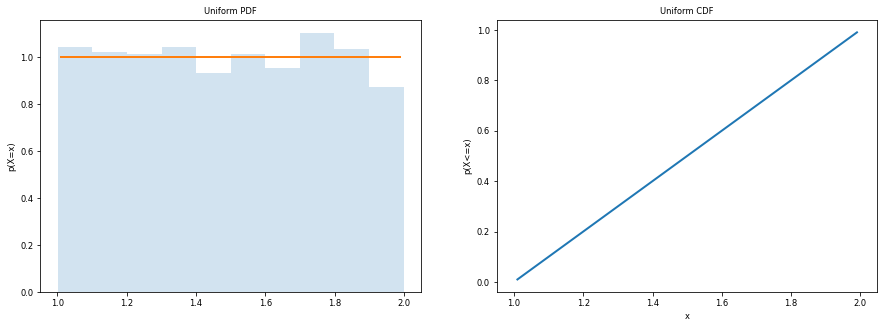

In [3]:
a,b = 1,2
uniform = stats.uniform(loc=a, scale=b-a) 
plot = plot_continuous(uniform)

-----------

# Exponential (Continuous)


### Models
Time between poisson events, e.g. time until taxi will pass street corner.

### Parameters

- `lambda` average number of independent events per interval.
- `x` observed time between events.

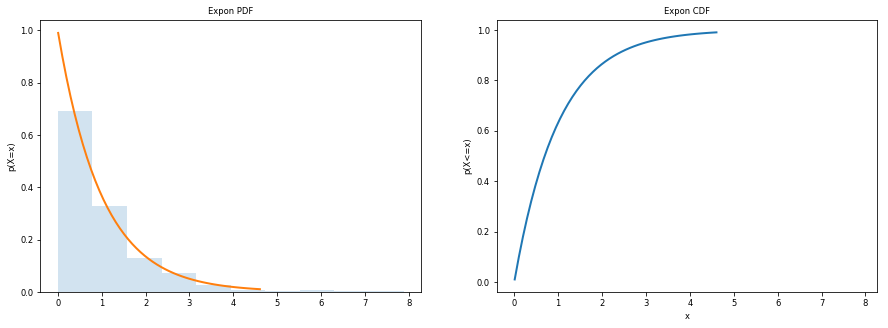

In [4]:
lam = 1  # lambda
exponential = stats.expon(scale=1/lam) 
plot = plot_continuous(exponential)

-----
# Gaussian (Continuous)

### Models

A bell curve, e.g. IQ score.

###  Parameters

 - `mu` mean or expectation. 
 - `sigma` standard deviation. 
 - `x` observed value.

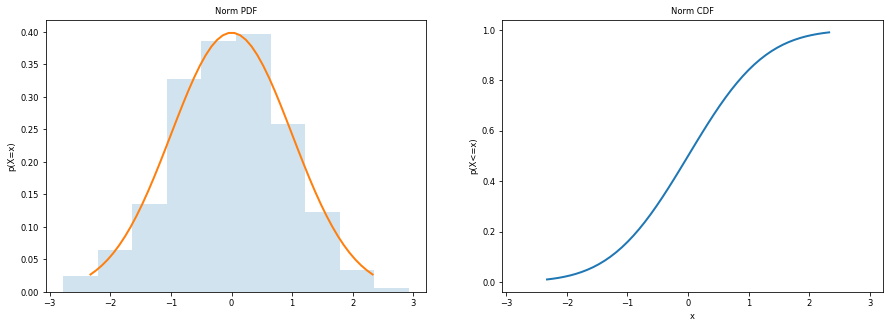

In [5]:
mu, sigma = 0, 1 
gaussian=stats.norm(loc=mu,scale=sigma) 
plot = plot_continuous(gaussian)

-----
# Bernoulli (Discrete)

### Models
One instance of a success or failure trial, e.g. (possibly unfair) coin toss.

### Parameters

- `p` probability of success.
- `k` failure or success, i.e. `{0,1}`, observation.

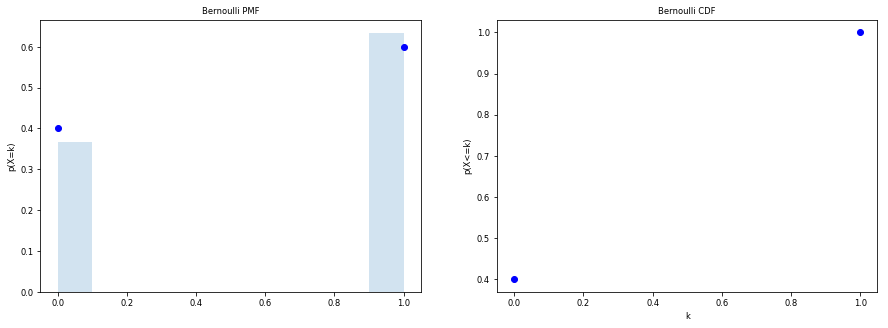

In [6]:
bernoulli = stats.bernoulli(p=0.6) 
plot = plot_discrete(bernoulli)

# Geometric (Discrete)

### Models
Number of Bernoulli trials until first success, e.g. number of trials until coin flip turns out to be heads. 

### Parameters
 - `p` probability of success (each trial).
 - `k` observed trials until success.

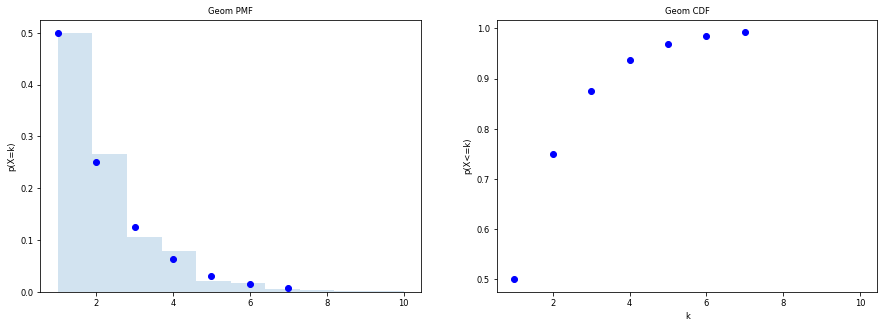

In [7]:
geometric = stats.geom(p=0.5) 
plot = plot_discrete(geometric)

---

# Poisson (Discrete)

### Models
Number of events occurring in a fixed interval, e.g. number of taxis passing a street corner in a given hour (on avg. 10/hr).

### Parameters

 - `lambda` average number of independent events per interval. 
 - `k` events observed in an interval. 

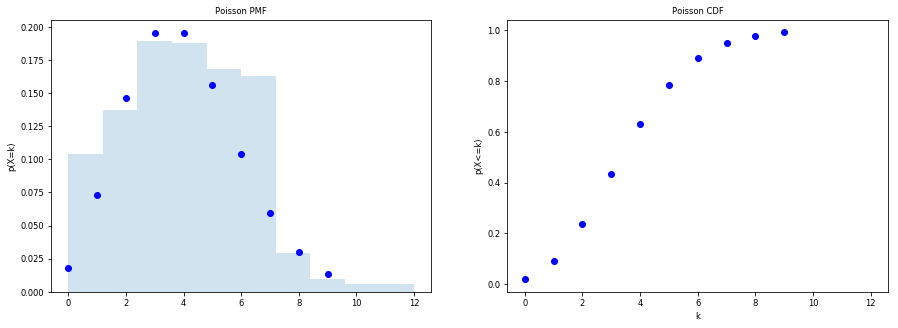

In [8]:
lam = 4  # lambda
poisson = stats.poisson(mu=lam) 
plot = plot_discrete(poisson)

# Binomial (Discrete)

### Models
Number of successes out of a number of Bernoulli trials  with replacement., e.g. number of coin flips out of 100 that turn out to be heads.

### Parameters:

- `p` probability of success (each trial).
- `n` number of independent trials.
- `k` observed number of successes

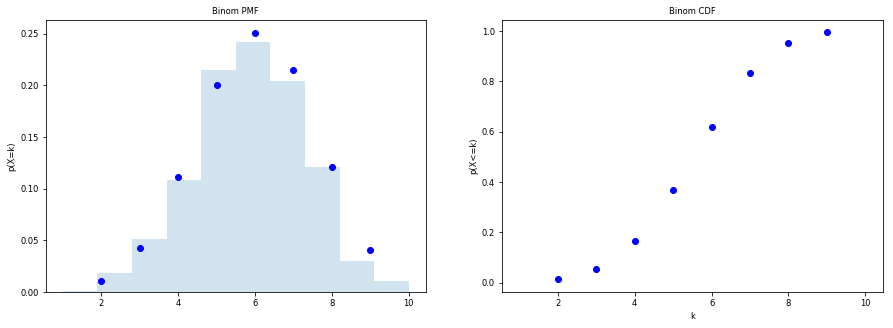

In [9]:
binomial=stats.binom(n=10,p=0.6); 
plot = plot_discrete(binomial)

# Weibull (Continuous)

### Models

Time between events when rate is not  constant, e.g. time-to-failure when rate of failure increases or decreases over time.

# Gamma (Continuous)

### Models

Waiting time between Poisson distributed events. Used when waiting times between events are relevant, e.g. aggregate insurance claims or the amount of rainfall accumulated in a reservoir.

# Hypergeometric (Discrete)

### Models

Number of successes out of a number of success or failure trials without  replacement, e.g. Number of times you draw a black ball from an urn of black and white balls without putting any back.